In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Grouping the skills by month
select only those job postings of data analysts in india. then extract the month number from `job_posted_date` column and then exploding the `job_skills` column so that we can have one skill per row 


In [2]:
#filtering the data so that we only have Data Analyst jobs in India
df_ind = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]=="India")].copy()

#extracting month from job_posted_date
df_ind["month_no"] = df_ind["job_posted_date"].dt.month

#exploding the skills column to have one skill per row
df_ind_explode = df_ind.explode("job_skills")

### Creating a Pivot Table
This pivot table uses `month_no` as the index and `job_skills` as the columns.  
Missing (NaN) values are filled with 0 to represent absence of a skill in that month.

In [15]:
# grouping the skills by month
df_ind_pivot = df_ind_explode.pivot_table(index="month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_ind_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


### Sorting the Pivot Table in Descending Order by Skills

We first create a new row labeled `Total`, which contains the sum of each skill across all months.  
Then, we sort the columns based on this total row in **ascending** order, and finally, remove the `Total` row after sorting.

In [ ]:
#sorting the columns in descending order
df_ind_pivot.loc["total"] = df_ind_pivot.sum()
df_ind_pivot = df_ind_pivot[df_ind_pivot.loc["total"].sort_values(ascending=False).index]
df_ind_pivot = df_ind_pivot.drop("total")
df_ind_pivot


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


### Plotting Monthly Skill Counts

We plot the monthly trend for the top 5 skills, using `month_no` as the index and the skills as columns.  
This helps visualize how the demand for each skill changes over different months.

<Figure size 1200x600 with 0 Axes>

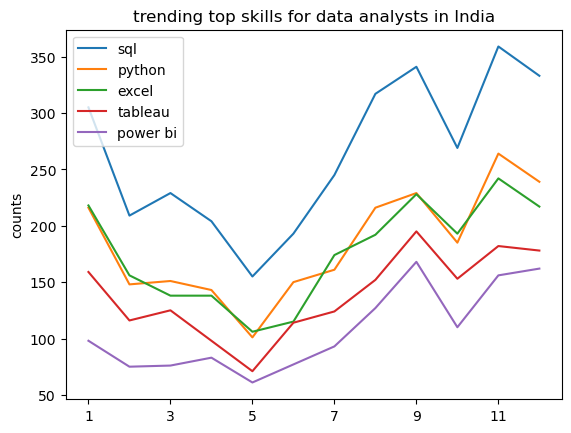

In [27]:
#plotting the monthly trend for the top 5 skills
plt.figure(figsize=(12, 6))
df_ind_pivot.iloc[:, 0:5].plot(kind="line")
plt.title("trending top skills for data analysts in India")
plt.xlabel("")
plt.ylabel("counts")
plt.legend(loc="upper left")

### Plotting Monthly Skill Percentages

Instead of raw skill counts, we calculate and plot the **percentage** of each skill per month.  
This gives a clearer picture of how demand changes over time, since total job postings may vary by month.  
We use `month_no` as the index and skills as columns to show trends across months.

In [ ]:
#total job postings per month
df_ind_total = df_ind.groupby("month_no").size()

df_ind_total

month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [ ]:
#calculating the percentage of each skill per month
df_ind_perc = df_ind_pivot.iloc[:12].div(df_ind_total/100, axis = 0)
df_ind_perc = df_ind_perc.reset_index()
df_ind_perc["month"] = pd.to_datetime(df_ind_perc["month_no"], format="%m").dt.strftime("%b")
df_ind_perc.set_index("month", inplace=True)
df_ind_perc.drop("month_no",axis=1, inplace=True)
df_ind_perc

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


### Plotting Monthly Skill Demand

We plot the percentage trends of the top 5 skills across different months using `df_ind_perc`.  
The legend is removed using `legend().remove()` for better readability and to reduce clutter.

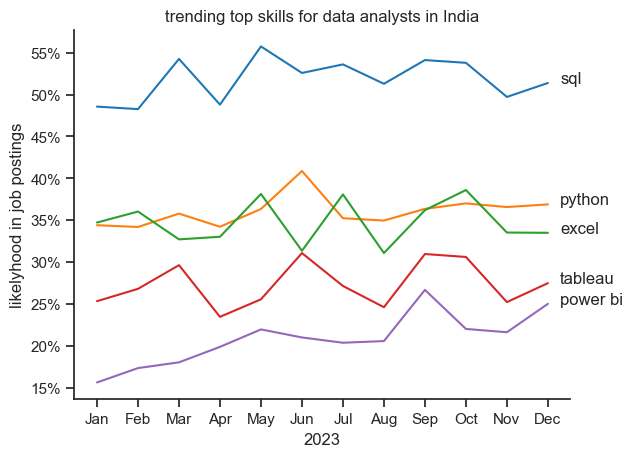

In [ ]:
from matplotlib.ticker import PercentFormatter
df_plot_perc = df_ind_perc.iloc[:, 0:5]
sns.lineplot(data=df_plot_perc, dashes=False, legend="full", palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("trending top skills for data analysts in India")
plt.ylabel("likelyhood in job postings")
plt.xlabel("2023")
plt.legend().remove()

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.3,df_plot_perc.iloc[-1, i], df_plot_perc.columns[i])

plt.show()